In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

houseprices_df.info()
houseprices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  landcontour utilities  ... poolarea poolqc fence miscfeature miscval mosold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  yrsold  saletype  salecondition  saleprice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [13]:
houseprices_df.salecondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [15]:
houseprices_df['street'] = pd.get_dummies(houseprices_df['street'], drop_first=True)
houseprices_df['alley'] = pd.get_dummies(houseprices_df['alley'], drop_first=True)
houseprices_df['salecondition'] = pd.get_dummies(houseprices_df['salecondition'], drop_first=True)

In [21]:
#Target Variable
Y = houseprices_df['saleprice']

#Feature Set
X = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]

In [22]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 465)

In [23]:
print('The number of observations for the Training set is: {}'.format(X_train.shape[0]))
print('The number of observations for the Testing set is: {}'.format(X_test.shape[0]))

The number of observations for the Training set is: 1095
The number of observations for the Testing set is: 365


In [25]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     699.2
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:00:10   Log-Likelihood:                -13105.
No. Observations:                1095   AIC:                         2.622e+04
Df Residuals:                    1089   BIC:                         2.625e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.864e+04   5316.526    -18.553      0.000   -1.09e+05   -8.82e+04
overallqual  2.464e+04   1236.510     19.930      0.000    2.22e+04    2.71e+04
grlivarea      42.4129      2.816     15.060      0.000      36.887      47.939
garagecars   1.727e+04   3500.370      4.935      0.000    1.04e+04    2.41e+04
garagearea     12.6046     11.875      1.061      0.289     -10.695      35.905
totalbsmtsf    26.7264      3.235      8.261      0.000      20.378      33.074
==============================================================================
Omnibus:                      388.186   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30410.350
Skew:                          -0.701   Prob(JB):                         0.00
Kurtosis:                      28.779   Cond. No.                     9.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

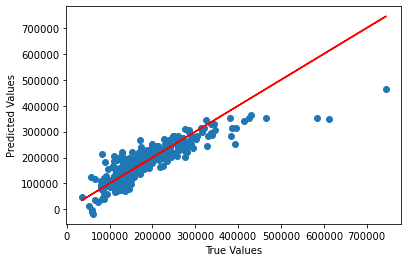

In [32]:
#Add constant to test set
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [36]:
print("Mean absolute error of the Prediction: {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error of the Prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the Prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the Prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))


Mean absolute error of the Prediction: 27259.54877510035
Mean squared error of the Prediction is: 1690373281.6061919
Root mean squared error of the Prediction is: 41114.14940876428
Mean absolute percentage error of the Prediction is: 17.20528194574934
